In [1]:
import pandas as pd
import os
import datetime as dt
from sampler import Sampler, strategies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Evaluation of strategies by correlation
## Strategies

In [2]:
pd.DataFrame.from_dict(strategies)

,A,B,C,D,E,F,G,H
kind,time,time,flow,flow,volume,volume,grab,grab
samplingfreq,1H,0.3333333333333333H,1H,0.3333333333333333H,NaN,NaN,NaN,NaN
samplingduration,60,60,60,60,60,60,120,120
volume,250,250,200,200,50,250,1000,1000
samplecount,NaN,NaN,NaN,NaN,24,72,NaN,NaN
samplingtime,NaN,NaN,NaN,NaN,NaN,NaN,09:00:00,12:00:00


## Import timeseries and fraction of infected

In [3]:
df_timeseries = pd.read_parquet(r"aggregated_results\aggregated_timeseries_ts3.parquet", engine="pyarrow")
df_infected = pd.read_parquet(r"aggregated_results\infected_rates.parquet", engine="pyarrow")

dtindex = pd.date_range(dt.datetime.today().date(), periods=8640, freq="10S")
df_timeseries.rename(columns={c:int(c) for c in df_timeseries.columns}, inplace=True)
df_timeseries["time"] = dtindex
df_timeseries.set_index("time", inplace=True)
df_timeseries.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
time,,,,,,,,,,,,,,,,,,,,,
2022-01-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.005497,0.0,0.0,0.0,0.0,0.0
2022-01-06 00:00:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.005411,0.0,0.0,0.0,0.0,0.0
2022-01-06 00:00:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.005325,0.0,0.0,0.0,0.0,0.0
2022-01-06 00:00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.005239,0.0,0.0,0.0,0.0,0.0
2022-01-06 00:00:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.005154,0.0,0.0,0.0,0.0,0.0


In [4]:
df_infected.head()

,sim_id,n_tot,n_inf,r_inf
0,0,58918,8,0.000136
1,1,58911,6,0.000102
2,2,58917,7,0.000119
3,3,58915,6,0.000102
4,4,58911,6,0.000102


In [5]:
sampler = Sampler()

flows = pd.read_csv(r"result_files\com2a_hydraulic.csv")
flows["time"] = dtindex
flows = flows.set_index("time")["flow-rate [l/s]"]

sampler.add_flows(flows)
sampler.flows.head()

time
2022-01-06 00:00:00    161.657272
2022-01-06 00:00:10    161.657272
2022-01-06 00:00:20    161.657272
2022-01-06 00:00:30    161.657272
2022-01-06 00:00:40    161.657272
Name: flow-rate [l/s], dtype: float64

## Select fraction of infected with most scenarios

In [6]:
df_infected["r_inf"].round(5).value_counts().head(10)

0.00034    38
0.00019    38
0.00054    37
0.00017    34
0.00051    33
0.00037    30
0.00020    30
0.00022    29
0.00041    28
0.00025    28
Name: r_inf, dtype: int64

In [36]:
df_to_sample = df_timeseries.loc[:,df_infected.loc[df_infected["r_inf"].round(5).isin([0.00054, 0.00034])].index]
df_to_sample.head()

,181,206,217,251,252,257,292,302,304,343,...,809,812,829,854,860,873,899,927,953,978
time,,,,,,,,,,,,,,,,,,,,,
2022-01-06 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006801,0.0,0.0,0.0,0.0,0.002281,0.0,0.0,0.005483,0.0
2022-01-06 00:00:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006741,0.0,0.0,0.0,0.0,0.002196,0.0,0.0,0.005423,0.0
2022-01-06 00:00:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006681,0.0,0.0,0.0,0.0,0.002112,0.0,0.0,0.005363,0.0
2022-01-06 00:00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006622,0.0,0.0,0.0,0.0,0.002027,0.0,0.0,0.005304,0.0
2022-01-06 00:00:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006562,0.0,0.0,0.0,0.0,0.001943,0.0,0.0,0.005244,0.0


In [110]:
df = pd.DataFrame(columns=["scenario","concentration","strategy","r_inf"])

for k, (name, strategy) in enumerate(strategies.items()):
    samples = pd.DataFrame(sampler.sample(df_to_sample, strategy))
    samples["strategy"] = name
    samples["kind"] = strategies.get(name).get("kind")
    samples["time"] = strategies.get(name).get("samplingtime", dt.time(hour=0)).strftime("%H:%M")
    samples = samples.join(df_infected["r_inf"])
    samples = samples.reset_index().rename(columns={"index":"scenario"})
    df = df.append(samples)
df.head()

,scenario,concentration,strategy,r_inf,kind,time
0,181,0.019205,A,0.000339,time,00:00
1,206,0.006449,A,0.000339,time,00:00
2,217,0.001230,A,0.000339,time,00:00
3,251,0.010234,A,0.000339,time,00:00
4,252,0.018542,A,0.000339,time,00:00


## Consistency of sampling strategies for individual fractions of infected

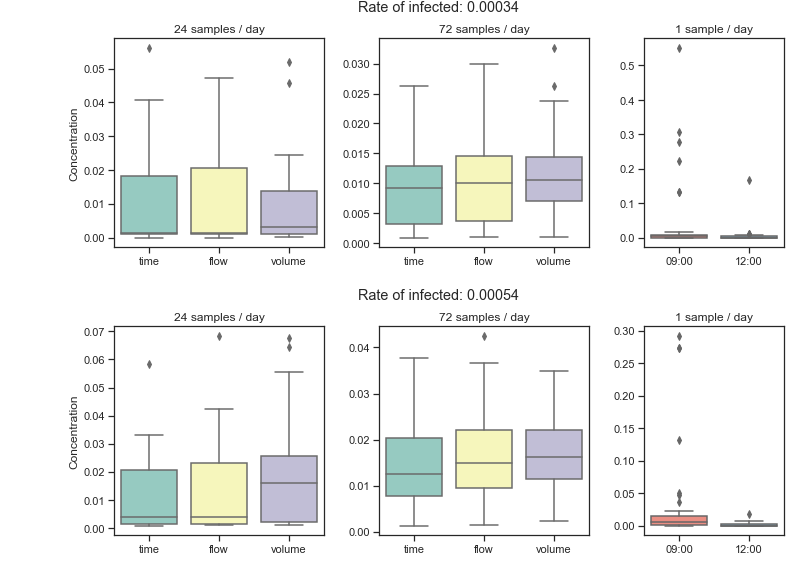

In [143]:
r_inf1, r_inf2 = 0.00034, 0.00054

fig = plt.figure(figsize=[12,8], facecolor=None)
fig.layout = 'tight'
fig.suptitle(" ")
fig.subplots_adjust(wspace=0.3, hspace=0.06, top=0.85)

subfigs = fig.subfigures(nrows=2, ncols=1)

#------------------------------------------------Row1-----------------------------------------------------------
ax1 = subfigs[0].subplots(ncols=3, nrows=1, gridspec_kw={'width_ratios': [3,3,2]})
subfigs[0].suptitle(f"Rate of infected: {r_inf1}")

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="kind", y="concentration", palette="Set3",
            data=df.loc[(df["strategy"].isin(["A","C","E"])) & (df["r_inf"].round(5)==0.00034)], ax=ax1[0])
#sns.swarmplot(x="kind", y="concentration", color=".25", data=df.loc[(df["strategy"].isin(["A","C","E"])) & (df["r_inf"].round(5)==0.00034)], ax=ax1[0])
sns.boxplot(x="kind", y="concentration", palette="Set3",
            data=df.loc[(df["strategy"].isin(["B","D","F"])) & (df["r_inf"].round(5)==0.00034)], ax=ax1[1])
#sns.swarmplot(x="kind", y="concentration", color=".25", data=df.loc[(df["strategy"].isin(["B","D","F"])) & (df["r_inf"].round(5)==0.00034)], ax=ax1[1])
sns.boxplot(x="time", y="concentration", palette=sns.color_palette("Set3")[3:],
            data=df.loc[(df["strategy"].isin(["G", "H"])) & (df["r_inf"].round(5)==0.00034)], ax=ax1[2])
for ax in ax1:
    ax.set(xlabel="", ylabel="")
ax1[0].set(ylabel="Concentration")
ax1[0].set(title="24 samples / day")
ax1[1].set(title="72 samples / day")
ax1[2].set(title="1 sample / day")

#------------------------------------------------Row2-----------------------------------------------------------
ax2 = subfigs[1].subplots(ncols=3, nrows=1, gridspec_kw={'width_ratios': [3,3,2]})
subfigs[1].suptitle(f"Rate of infected: {r_inf2}")
#subfigs[1].supxlabel("weighting method / sampling time")
#subfigs[1].supylabel("concentration")
                    
sns.boxplot(x="kind", y="concentration", palette="Set3",
            data=df.loc[(df["strategy"].isin(["A","C","E"])) & (df["r_inf"].round(5)==0.00054)], ax=ax2[0])
#sns.swarmplot(x="kind", y="concentration", color=".25", data=df.loc[(df["strategy"].isin(["A","C","E"])) & (df["r_inf"].round(5)==0.00054)], ax=ax2[0])
sns.boxplot(x="kind", y="concentration", palette="Set3",
            data=df.loc[(df["strategy"].isin(["B","D","F"])) & (df["r_inf"].round(5)==0.00054)], ax=ax2[1])
#sns.swarmplot(x="kind", y="concentration", color=".25", data=df.loc[(df["strategy"].isin(["B","D","F"])) & (df["r_inf"].round(5)==0.00054)], ax=ax2[1])
sns.boxplot(x="time", y="concentration", palette=sns.color_palette("Set3")[3:],
            data=df.loc[(df["strategy"].isin(["G", "H"])) & (df["r_inf"].round(5)==0.00054)], ax=ax2[2])
for ax in ax2:
    ax.set(xlabel="", ylabel="")
ax2[0].set(ylabel="Concentration")
ax2[0].set(title="24 samples / day")
ax2[1].set(title="72 samples / day")
ax2[2].set(title="1 sample / day")

plt.savefig("eval_consistency1.svg")

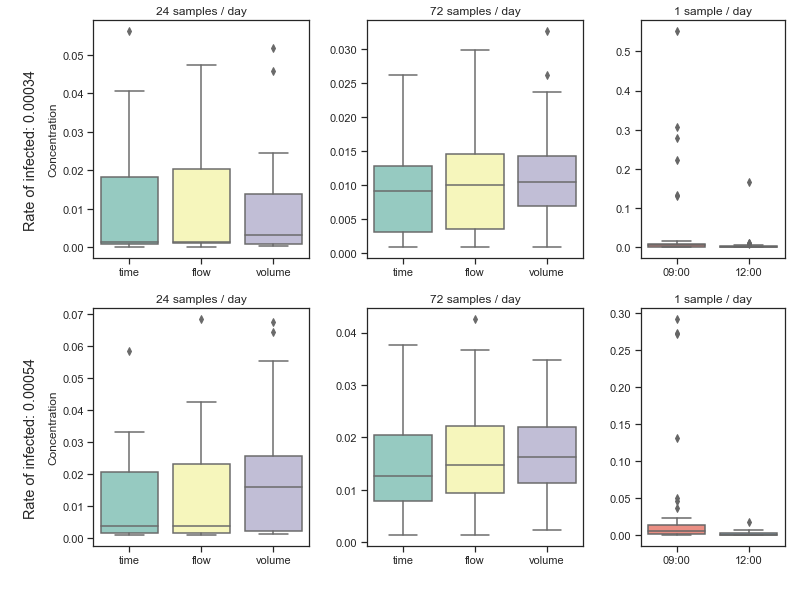

In [132]:
r_inf1, r_inf2 = 0.00034, 0.00054

fig = plt.figure(figsize=[12,8], facecolor=None)
fig.layout = 'tight'
fig.suptitle(" ")
fig.subplots_adjust(wspace=0.3, hspace=0.06, top=0.95, left=0.1)

subfigs = fig.subfigures(nrows=2, ncols=1)

#------------------------------------------------Row1-----------------------------------------------------------
ax1 = subfigs[0].subplots(ncols=3, nrows=1, gridspec_kw={'width_ratios': [3,3,2]})
subfigs[0].supylabel(f"Rate of infected: {r_inf1}")

sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="kind", y="concentration", palette="Set3",
            data=df.loc[(df["strategy"].isin(["A","C","E"])) & (df["r_inf"].round(5)==0.00034)], ax=ax1[0])
sns.boxplot(x="kind", y="concentration", palette="Set3",
            data=df.loc[(df["strategy"].isin(["B","D","F"])) & (df["r_inf"].round(5)==0.00034)], ax=ax1[1])
sns.boxplot(x="time", y="concentration", palette=sns.color_palette("Set3")[3:],
            data=df.loc[(df["strategy"].isin(["G", "H"])) & (df["r_inf"].round(5)==0.00034)], ax=ax1[2])
for ax in ax1:
    ax.set(xlabel="", ylabel="")
ax1[0].set(ylabel="Concentration")
ax1[0].set(title="24 samples / day")
ax1[1].set(title="72 samples / day")
ax1[2].set(title="1 sample / day")

#------------------------------------------------Row2-----------------------------------------------------------
ax2 = subfigs[1].subplots(ncols=3, nrows=1, gridspec_kw={'width_ratios': [3,3,2]})
subfigs[1].supylabel(f"Rate of infected: {r_inf2}")
#subfigs[1].supxlabel("weighting method / sampling time")
#subfigs[1].supylabel("concentration")
                    
sns.boxplot(x="kind", y="concentration", palette="Set3",
            data=df.loc[(df["strategy"].isin(["A","C","E"])) & (df["r_inf"].round(5)==0.00054)], ax=ax2[0])
sns.boxplot(x="kind", y="concentration", palette="Set3",
            data=df.loc[(df["strategy"].isin(["B","D","F"])) & (df["r_inf"].round(5)==0.00054)], ax=ax2[1])
sns.boxplot(x="time", y="concentration", palette=sns.color_palette("Set3")[3:],
            data=df.loc[(df["strategy"].isin(["G", "H"])) & (df["r_inf"].round(5)==0.00054)], ax=ax2[2])
for ax in ax2:
    ax.set(xlabel="", ylabel="")
ax2[0].set(ylabel="Concentration")
ax2[0].set(title="24 samples / day")
ax2[1].set(title="72 samples / day")
ax2[2].set(title="1 sample / day")

plt.savefig("eval_consistency2.svg")

## Consistency of sampling strategies as deviation from expected from regression